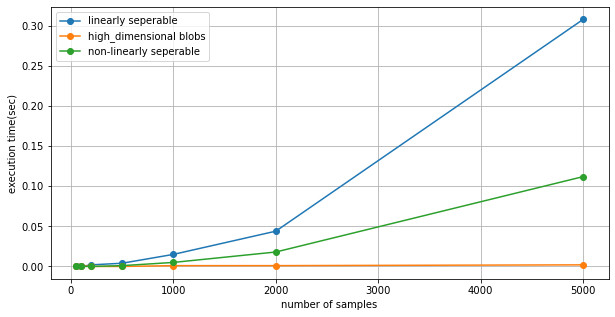

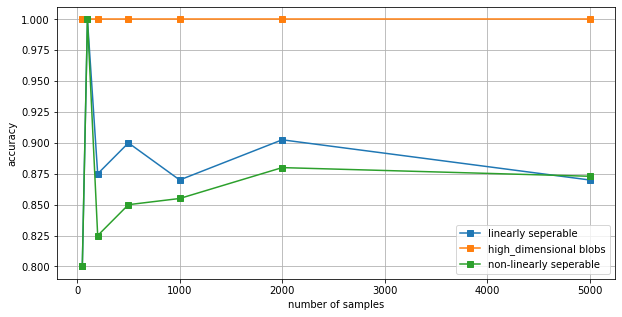

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification,make_moons,make_blobs
import time
sample_sizes = [50,100,200,500,1000,2000,5000]
datasets={"linearly seperable":lambda n: make_classification(n_samples=n,n_features=20,n_classes=2, random_state=42),
         "high_dimensional blobs": lambda n: make_blobs(n_samples=n,centers=3,n_features=10,random_state=42),
         "non-linearly seperable": lambda n: make_moons(n_samples=n,noise=0.2,random_state=42),}
execution_times={key: [] for key in datasets}
accuracies={key: [] for key in datasets}
for dataset_name, data_func in datasets.items():
    for size in sample_sizes:
        X,y = data_func(size)
        X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
        model=SVC(kernel='linear')
        start_time=time.time()
        model.fit(X_train,y_train)
        end_time=time.time()
        y_pred = model.predict(X_test)
        acc= accuracy_score(y_test,y_pred)
        execution_times[dataset_name].append(end_time-start_time)
        accuracies[dataset_name].append(acc)
plt.figure(figsize=(10,5))
for dataset_name in datasets:
    plt.plot(sample_sizes,execution_times[dataset_name],marker='o',label=dataset_name)
plt.xlabel("number of samples")
plt.ylabel("execution time(sec)")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10,5))
for dataset_name in datasets:
    plt.plot(sample_sizes,accuracies[dataset_name],marker='s',label=dataset_name)
plt.xlabel("number of samples")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()